# Hypothesis Testing
Susan Shin


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Q1. Do smokers have higher insurance charges than non-smokers?

* State your Null Hypothesis and Alternative Hypothesis
    * This question's null hypothesis would be that smoking has no effect on insurance compared to non-smokers.
    * Alternative hypothesis would be that smokers have higher insurance charges than non-smokers.
* Select the correct test according to the data type and number of samples
* Test the assumptions of your selected test.
* Execute the selected test, or the alternative test (if you do not meet the assumptions)
* Interpret your p-value and reject or fail to reject your null hypothesis 
* Show a supporting visualization that helps display the result

In [5]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<AxesSubplot: xlabel='charges', ylabel='Count'>

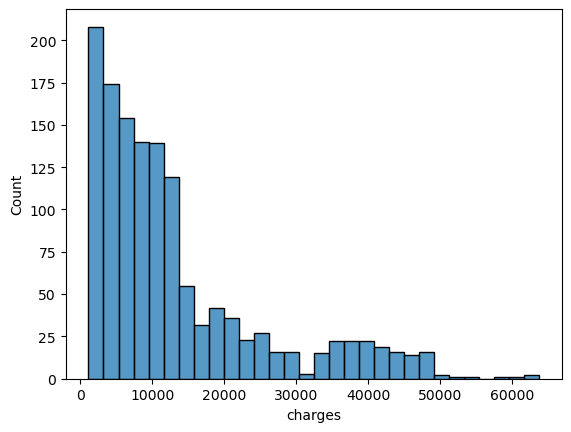

In [11]:
sns.histplot(data=df, x= 'charges')

In [12]:
stats.normaltest(df['charges'])

NormaltestResult(statistic=336.8851220567733, pvalue=7.019807901276197e-74)

In [13]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [14]:
## generate a linearly-spaced array of values that span the min to the max
xs = np.linspace(df['charges'].min(),df['charges'].max())
xs

array([ 1121.8739    ,  2400.41582061,  3678.95774122,  4957.49966184,
        6236.04158245,  7514.58350306,  8793.12542367, 10071.66734429,
       11350.2092649 , 12628.75118551, 13907.29310612, 15185.83502673,
       16464.37694735, 17742.91886796, 19021.46078857, 20300.00270918,
       21578.5446298 , 22857.08655041, 24135.62847102, 25414.17039163,
       26692.71231224, 27971.25423286, 29249.79615347, 30528.33807408,
       31806.87999469, 33085.42191531, 34363.96383592, 35642.50575653,
       36921.04767714, 38199.58959776, 39478.13151837, 40756.67343898,
       42035.21535959, 43313.7572802 , 44592.29920082, 45870.84112143,
       47149.38304204, 48427.92496265, 49706.46688327, 50985.00880388,
       52263.55072449, 53542.0926451 , 54820.63456571, 56099.17648633,
       57377.71840694, 58656.26032755, 59934.80224816, 61213.34416878,
       62491.88608939, 63770.42801   ])

In [16]:
## use stats.norm.pdf to get the PDF curve that corresponds to your distribution's values
pdf = stats.norm.pdf(xs, loc = df['charges'].mean(),scale = df['charges'].std())
pdf

array([1.99174642e-05, 2.20196868e-05, 2.40739492e-05, 2.60281112e-05,
       2.78289665e-05, 2.94246030e-05, 3.07668658e-05, 3.18137609e-05,
       3.25316341e-05, 3.28969668e-05, 3.28976551e-05, 3.25336763e-05,
       3.18170896e-05, 3.07713726e-05, 2.94301448e-05, 2.78353726e-05,
       2.60351923e-05, 2.40815065e-05, 2.20275210e-05, 1.99253843e-05,
       1.78240708e-05, 1.57676221e-05, 1.37938220e-05, 1.19333435e-05,
       1.02093661e-05, 8.63762855e-06, 7.22685565e-06, 5.97947903e-06,
       4.89256298e-06, 3.95884605e-06, 3.16781574e-06, 2.50674595e-06,
       1.96164241e-06, 1.51805837e-06, 1.16175945e-06, 8.79231147e-07,
       6.58035050e-07, 4.87028190e-07, 3.56466140e-07, 2.58012993e-07,
       1.84681750e-07, 1.30727061e-07, 9.15094873e-08, 6.33469717e-08,
       4.33655346e-08, 2.93577429e-08, 1.96543973e-08, 1.30123552e-08,
       8.51944292e-09, 5.51601701e-09])

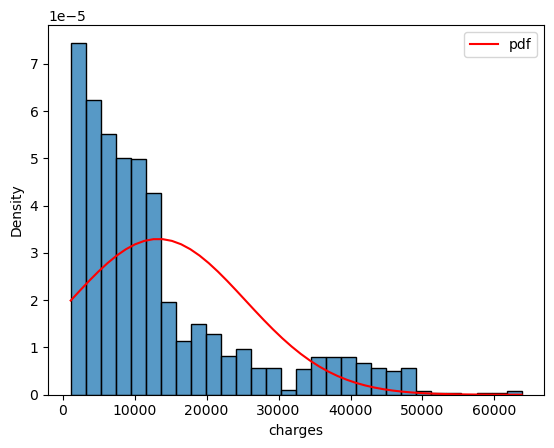

In [38]:
## Plot the histogram again AND then plot the pdf we calculated.
sns.histplot(data=df, x= 'charges', stat = 'density')
plt.plot(xs,pdf,color = 'red',label = 'pdf')
plt.legend()

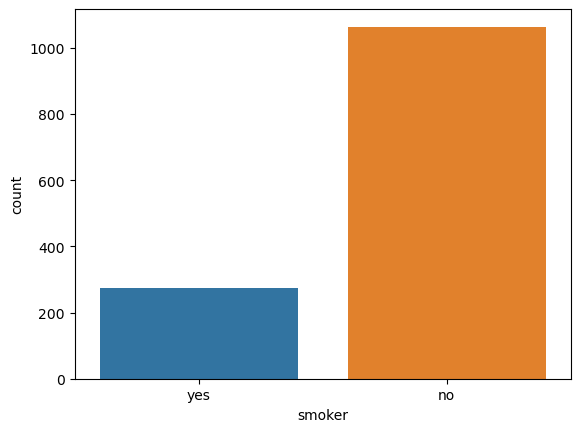

In [36]:
sns.countplot(data=df,x='smoker');

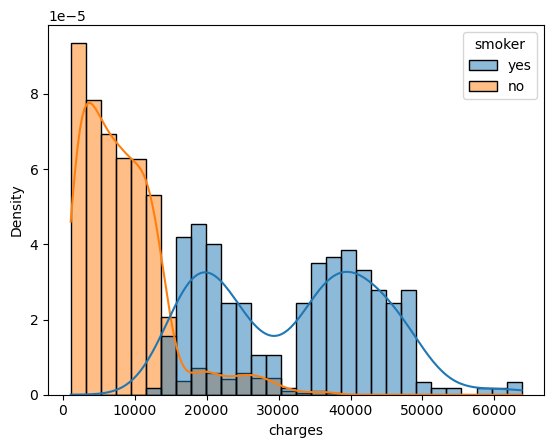

In [34]:
sns.histplot(data=df, x='charges',hue='smoker',common_norm=False, 
             stat='density',kde=True);

In [23]:
smoke_yes = df.loc[df['smoker']=="yes", 'charges']
smoke_no = df.loc[df['smoker']=="no", 'charges']

display(smoke_yes.head(), smoke_no.head())

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

In [25]:
## check yes group for outliers using z-score >3 rule.
outliers_yes = np.abs(stats.zscore(smoke_yes))>3
outliers_yes.sum()

0

In [26]:
outliers_no = np.abs(stats.zscore(smoke_no))>3
outliers_no.sum()

24

In [27]:
## use normaltest to check if yes group is normally distributed
stats.normaltest(smoke_yes)

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [28]:
## use normaltest to check if no group is normally distributed
stats.normaltest(smoke_no)

NormaltestResult(statistic=316.4528082392722, pvalue=1.9193129759002216e-69)

In [29]:
## use Levene's test to check if groups have equal variance
stats.levene(smoke_no, smoke_yes)

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)

In [30]:
## run stats.ttest_ind on the 2 groups
stats.ttest_ind(smoke_yes, smoke_no)

Ttest_indResult(statistic=46.66492117272371, pvalue=8.271435842179101e-283)

What is our p-value? Is it less than our alpha of .05? What does this mean?

Our T-Test returned a p-value of ____. Since p </>.05, we can reject/fail to reject the null hypothesis that students with internet access have the same average grades as students who do not.

We therefore conclude that there is/is not a significant difference in Average Grades between students who do/do not have internet access.

Our visualization below shows that students with internet access have HIGHER/LOWER/EQUAL average grades.

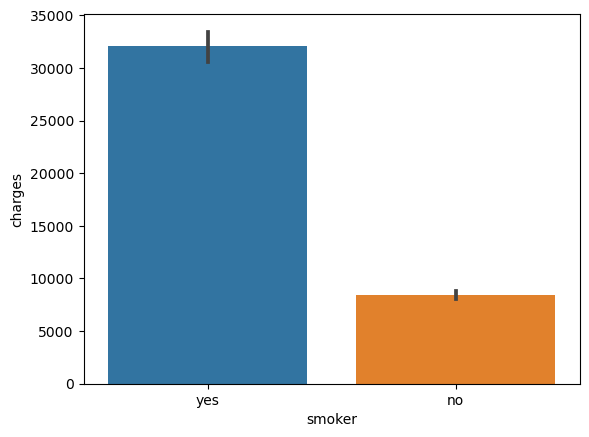

In [35]:
## Add a summary visual to support our results.
sns.barplot(data=df, x='smoker', y='charges');

# Q2. Are men more likely to smoke than women?

* State your Null Hypothesis and Alternative Hypothesis
    * This question's null hypothesis would be that gender has no effect on the likelyhood to smoke.
    * Alternative hypothesis would be that men are more likely to smoke than women.
* Select the correct test according to the data type and number of samples
* Test the assumptions of your selected test.
* Execute the selected test, or the alternative test (if you do not meet the assumptions)
* Interpret your p-value and reject or fail to reject your null hypothesis 
* Show a supporting visualization that helps display the result

# Q3. Do different regions have different charges, on average?

* State your Null Hypothesis and Alternative Hypothesis
    * This question's null hypothesis would be that regionality does no affect insurance prices.
    * Alternative hypothesis would be that certain regions have different average charges.
* Select the correct test according to the data type and number of samples
* Test the assumptions of your selected test.
* Execute the selected test, or the alternative test (if you do not meet the assumptions)
* Interpret your p-value and reject or fail to reject your null hypothesis 
* Show a supporting visualization that helps display the result